<a href="https://colab.research.google.com/github/Joevalenzuela06/Joe_BDI_Project/blob/main/League_of_Legends__Analysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**League of Legends 
Analysis - Details to Success**


---


(First 10 Minutes of Diamond Ranked Games)



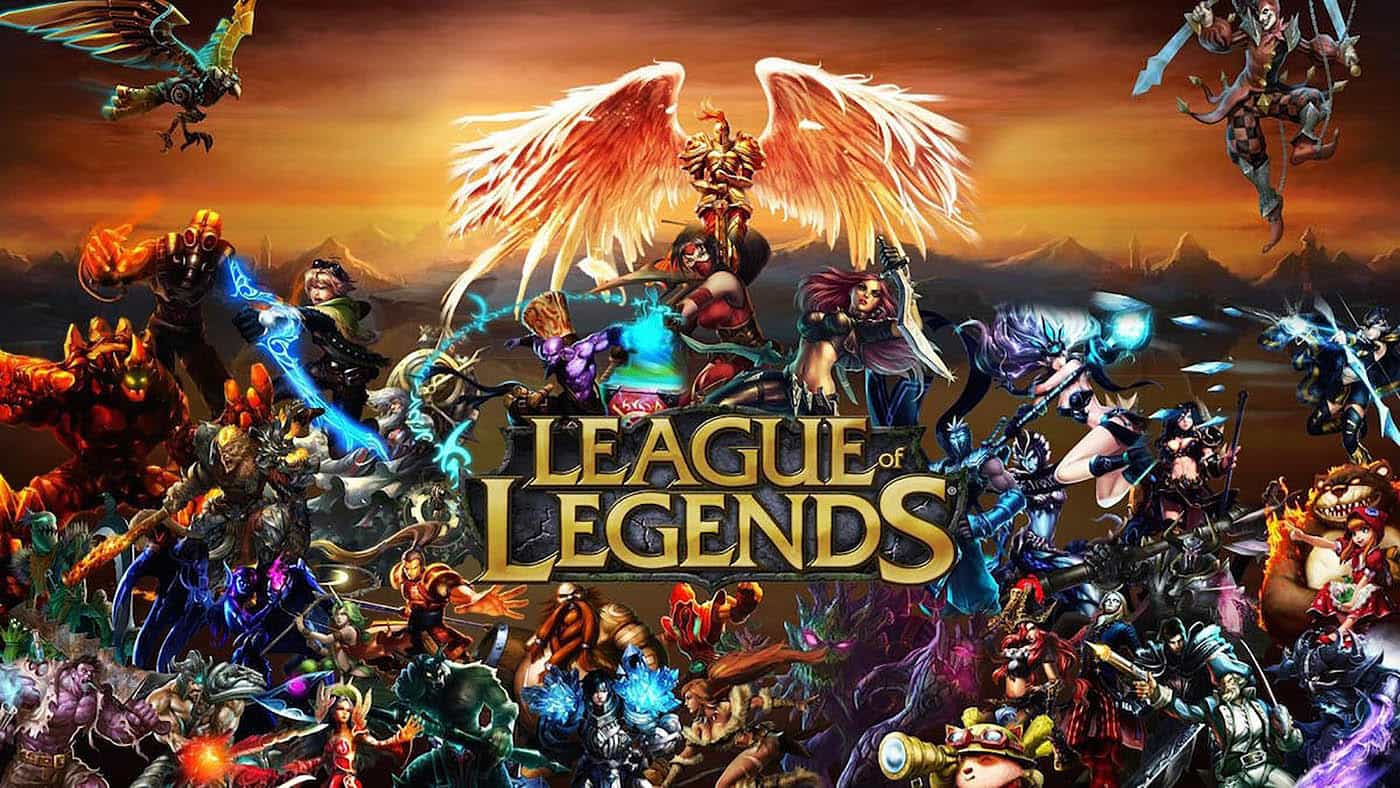

# Introduction

**Analysis of first 10 mins of Diamond Ranked games **

Chosen because it is one of the most popular games globally and my personal favorite for two years

Analyzing purely for wins requires more information for ranking system, champions played/statistics , time stamps and more. For this report I will instead cover on what becomes more focused on in higher levels of play.
 

How to play - win by destroying nexus

•	2 teams of 5 players each (red and blue team)
•	Objectives - push 3 turrets, inhibitor in at least one lane reach nexus
•	Map -  2bases housing red or blue nexus, 
•	3 horizontal lanes with river running vertically and remainder being the jungle 
•	Jungle is spread with monsters some of which give buffs 
•	Players go into lanes
•	Player choices of 150+ champ pool 
•	Each individual play style to fit into 5 roles, top, mid, jungle and bot (bot consists of a carry and support) 
•	Ultimately comes down to decision making and team fighting with some smaller number skirmishes (less that full team fights)
•	Player last hit minions to gain gold which can be spent on items granting better stats in numerous options 



Definitions

•	First 10 of roughly 35-45 min games, can vary. 
•	Champs - playable character that can auto attack, move and use abilities that can us energy, mana, or health with cooldown times
•	Top/mid/jungle/bot - name of lanes 
•	Nexus - crystal in base 
•	Minions -small weak creatures that assist in pushing turrets 
•	Jungle monsters (can all respawn after a set time of being killed
    •	Dragons (infernal, water, air, earth and elder - champ buffs (dmg, ability haste, movement speed, mana regen 
    •	Baron - minions buff
    •	Rift herald - deployable monster that helps take turrets once defeated
    •	Golem - blue - mana and abilty haste
    •	Brambleback - red - burn damage over time and health regen 
    •	Buffs - additional stats to champ or minons that grant more damage, mana regeneration, health regen, movement speed, minions buff


•	Wards - trinkets that granted vision in a small radius wherever placed for 
•	Can be destroyed
    	Red - Yellow - Oracle - blue 
•	First blood - first kill of the game of a player
•	Assist  - given when aiding in damaging leading to a kill on another player 
•	Gold diff - difference in gold between teams in total 
•	CS per min - amount of minons that were last hit per minute 
•	Higher cs = more gold
• Experience - what levels up the champions (higher level means better stats)
•	Much more information but this is all that is necessary for understanding the data and fundamentals of the game 
 

With fundamental laid down - I chose to analysis this set 
•	To get a better understanding of what a good or improving player should focus on in order to win or play better


# Data Set Introduced

In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pd.set_option('display.max_columns', 50)

In [2]:
#read data set
df = pd.read_csv("https://github.com/Joevalenzuela06/Joe_BDI_Project/blob/main/high_diamond_ranked_10min.csv.zip?raw=true", compression='zip')

In [3]:
#rows and columns
rows = df.shape[0]
cols = df.shape[1]
print('There are', rows, 'rows and', cols, 'columns' )

There are 9879 rows and 40 columns


In [4]:
#checking data type of all rows and colums 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
#Parse data to look for strings to turn into valid datetime values if needed 
#Not Needed (No Dates) 

In [6]:
#Show columns for first few rows
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [7]:
#Show last few rows
df.tail()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8
9878,4523772935,1,18,0,1,6,6,5,0,0,0,0,16266,7.0,17321,207,44,927,-58,20.7,1626.6,9,2,0,6,6,4,1,1,0,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9


In [8]:
#Show random sample with 9879 total rows
n = np.random.randint(9879)
df.sample(n)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
398,4520706889,1,15,5,0,11,10,8,0,0,0,0,17503,6.8,17699,192,52,-215,-438,19.2,1750.3,52,4,1,10,11,13,0,0,0,0,17718,7.0,18137,210,42,215,438,21.0,1771.8
7201,4525292315,1,38,2,0,6,10,7,1,0,1,0,16014,7.2,18062,211,56,-2651,-1289,21.1,1601.4,15,3,1,10,6,13,1,1,0,0,18665,7.2,19351,240,51,2651,1289,24.0,1866.5
3111,4521689217,0,16,2,0,3,7,2,1,1,0,0,15252,7.0,18024,224,56,-1293,-380,22.4,1525.2,38,3,1,7,3,8,0,0,0,0,16545,7.0,18404,219,48,1293,380,21.9,1654.5
5782,4498068359,1,13,2,0,3,7,2,0,0,0,0,15412,6.8,17502,211,45,-3768,-2111,21.1,1541.2,16,3,1,7,3,9,2,1,1,1,19180,7.4,19613,246,64,3768,2111,24.6,1918.0
4461,4502671483,0,13,3,1,5,9,7,2,1,1,0,15090,6.6,15998,176,56,-3684,-3135,17.6,1509.0,15,1,0,9,5,11,0,0,0,0,18774,7.0,19133,246,51,3684,3135,24.6,1877.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5770,4461499793,0,16,3,1,4,4,3,0,0,0,0,16175,6.8,17305,253,48,684,-474,25.3,1617.5,12,1,0,4,4,4,0,0,0,0,15491,7.0,17779,232,46,-684,474,23.2,1549.1
6580,4465757156,1,18,2,1,6,2,7,0,0,0,0,16695,6.8,17863,236,51,1755,717,23.6,1669.5,35,5,0,2,6,1,1,1,0,0,14940,6.8,17146,234,52,-1755,-717,23.4,1494.0
568,4505843833,1,15,5,1,11,9,8,0,0,0,0,17528,7.0,18271,191,48,171,618,19.1,1752.8,37,3,0,9,11,10,0,0,0,0,17357,6.6,17653,209,32,-171,-618,20.9,1735.7
2900,4456581816,1,12,2,1,6,5,3,0,0,0,0,16059,7.2,18356,212,59,584,1023,21.2,1605.9,19,2,0,5,6,8,0,0,0,0,15475,6.8,17333,207,36,-584,-1023,20.7,1547.5


In [9]:
#Preprocess data as necessay (checking rows with missing values and outliers)
df_missing = df[df.notna()]
df_missing

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,0,0,17765,7.2,18967,211,69,2519,2469,21.1,1776.5,46,3,0,4,7,7,0,0,0,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,0,0,16238,7.2,19255,233,48,782,888,23.3,1623.8,12,21,1,4,6,3,0,0,0,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,0,0,15903,7.0,18032,210,45,-2416,-1877,21.0,1590.3,14,0,1,7,6,11,1,1,0,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,0,0,14459,6.6,17229,224,48,-839,-1085,22.4,1445.9,66,4,0,3,2,1,0,0,0,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [10]:
#Aggregate data (filter by blueWins and sort by descending)
df_sorted = df.sort_values('blueWins', ascending=False)
df_sorted

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9878,4523772935,1,18,0,1,6,6,5,0,0,0,0,16266,7.0,17321,207,44,927,-58,20.7,1626.6,9,2,0,6,6,4,1,1,0,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9
7741,4518362407,1,14,4,1,11,5,5,2,1,1,1,19172,7.0,18959,242,52,3456,3233,24.2,1917.2,18,5,0,5,11,5,0,0,0,0,15716,6.4,15726,197,52,-3456,-3233,19.7,1571.6
4081,4492509344,1,18,3,0,4,3,3,1,1,0,0,15442,7.2,18590,220,64,-79,-815,22.0,1544.2,51,3,1,3,4,4,1,0,1,0,15521,7.2,19405,217,72,79,815,21.7,1552.1
4080,4523657645,1,16,5,0,5,4,5,1,0,1,0,15436,7.0,18911,220,48,-684,-742,22.0,1543.6,39,5,1,4,5,6,1,1,0,0,16120,7.2,19653,267,53,684,742,26.7,1612.0
7818,4526583162,1,16,4,1,9,3,13,1,1,0,0,19186,7.2,19737,261,52,4331,3427,26.1,1918.6,14,2,0,3,9,4,0,0,0,0,14855,6.4,16310,199,48,-4331,-3427,19.9,1485.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4344,4500650669,0,16,3,0,5,6,3,0,0,0,0,16032,7.0,18159,229,58,-478,-389,22.9,1603.2,23,3,1,6,5,6,1,1,0,0,16510,7.0,18548,221,48,478,389,22.1,1651.0
4342,4455149960,0,15,4,0,3,5,2,2,1,1,0,15073,6.8,16649,234,44,-745,-1826,23.4,1507.3,42,2,1,5,3,3,0,0,0,0,15818,7.0,18475,200,66,745,1826,20.0,1581.8
4335,4523041971,0,32,2,1,1,5,2,1,0,1,0,14197,6.8,17212,225,48,-2144,-2451,22.5,1419.7,14,19,0,5,1,3,1,1,0,0,16341,7.2,19663,246,52,2144,2451,24.6,1634.1
4334,4522652739,0,16,4,1,4,2,3,2,1,1,0,16125,7.2,19055,235,56,1236,144,23.5,1612.5,28,4,0,2,4,2,0,0,0,0,14889,7.4,18911,249,60,-1236,-144,24.9,1488.9


In [11]:
#Group by red and blue total experience 
blue_df_grouped = df.groupby('blueWins', as_index=False).agg({'blueTotalExperience': ['min', 'max', 'mean', 'sum', 'count', 'std']})
display(blue_df_grouped)
red_df_grouped = df.groupby('blueWins', as_index=False).agg({'redTotalExperience': ['min', 'max', 'mean', 'sum', 'count', 'std']})
display(red_df_grouped)


blueWins blueTotalExperience                                      \
                           min    max         mean       sum count   
0        0               10098  22224  17453.47161  86377231  4949   
1        1               14181  22125  18404.57789  90734569  4930   

                
           std  
0  1128.685669  
1  1075.294035

blueWins redTotalExperience                                       \
                          min    max          mean       sum count   
0        0              14029  22269  18425.370580  91187159  4949   
1        1              10465  21135  17496.303448  86256776  4930   

                
           std  
0  1073.888333  
1  1135.276951

# Data Plotly Distributions 

In [12]:
#Wins
first = px.pie(
    df,
    names= 'blueWins',
    title = 'Blue v. Red Wins',
    width=500,
    height = 500
)
first.show()

In [13]:
#Gold to kills
secondB = px.bar(
    df,
    x='blueKills',
    y = 'blueTotalGold',
    title= 'Blue Gold to Kills Bar',
)
secondB.show() 
secondR = px.bar(
    df,
    x='redKills',
    y = 'redTotalGold',
    title= 'Red Gold to Kills Bar',
)
secondR.show() 

In [14]:
#wards
thirdB = px.histogram(df, x='blueTotalExperience', title='Blue Total Experience', nbins=36)
thirdR = px.histogram(df, x='redTotalExperience', title='Red Total Experience', nbins=36)
thirdB.show()
thirdR.show()

In [15]:
#Kills per Deaths
fourthB = px.scatter(
    df, 
    x='blueDeaths',
    y='blueKills',
    title= 'Blue Kills per Death Scatter',
    size = 'blueKills',
    color='blueKills',
    template= 'plotly_dark',
    width=800,
    height = 800,
)
fourthB.show()

fourthR = px.scatter(
    df, 
    x='redDeaths',
    y='redKills',
    title= 'Red Kills per Death Scatter',
    size = 'redKills',
    color='redKills',
    template= 'plotly_dark',
    width=800,
    height = 800,
)
fourthR.show()


In [16]:
#Warding during Game
FifthB = px.box(
    df[df['blueWardsPlaced'] <230],
    x='blueWardsPlaced',
    orientation='h',
    title='Blue Warding'
)
FifthB.show()
FifthR = px.box(
    df[df['redWardsPlaced'] <230],
    x='redWardsPlaced',
    orientation='h',
    title='Red Warding'
)
FifthR.show()

In [17]:
#Assists
Sixth= px.density_heatmap(
    df,
    y='redTotalGold',
    x='blueTotalGold',
    title='Blue to Red Gold Density'
)
Sixth.show()

**Findings**
With these data plots we are able to get a straight idea of what we should expect in our first 10 minutes in game. We should use these as a basis for deciding what we need to improve on and a ball park figure of what a high level player should aim more towards doing.

For example, with the first graph, we straight away get the idea that the games have no tangible benefits on map side and that every games is a 50/50 chance.

For the second, we get a trend of the amount of gold we should have per kill, helping us to see if we are performing or underperforming.

Fourth helps us see a good blend of kills per death that we should be aiming for. 

Sixth shows us where the majority of players stand on gold efficiency, helping us to see if we are gaining gold at adequate levels. 

These plots barely get us into the mindset of improving our playstyle and decisions. With this information we can react more accordingly during our games, knowing how we standing the proper ranked games.